# Variable transformers : ReciprocalTransformer

The ReciprocalTransformer() applies the reciprocal transformation 1 / x
to numerical variables.

The ReciprocalTransformer() only works with numerical variables with non-zero
values. If a variable contains the value 0, the transformer will raise an error.

**For this demonstration, we use the Ames House Prices dataset produced by Professor Dean De Cock:**

Dean De Cock (2011) Ames, Iowa: Alternative to the Boston Housing
Data as an End of Semester Regression Project, Journal of Statistics Education, Vol.19, No. 3

http://jse.amstat.org/v19n3/decock.pdf

https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627

The version of the dataset used in this notebook can be obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from feature_engine.transformation import ReciprocalTransformer
from feature_engine.imputation import ArbitraryNumberImputer

In [2]:
#Read data
data = pd.read_csv('houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis=1), data['SalePrice'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1022, 79), (438, 79))

In [4]:
# Initializing transformer
rt = ReciprocalTransformer(variables = ['LotArea', 'GrLivArea'])

rt.fit(X_train)

ReciprocalTransformer(variables=['LotArea', 'GrLivArea'])

<AxesSubplot:>

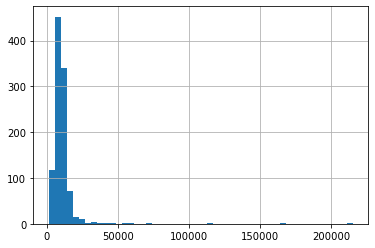

In [5]:
#before transforming
X_train['LotArea'].hist(bins=50)

<AxesSubplot:>

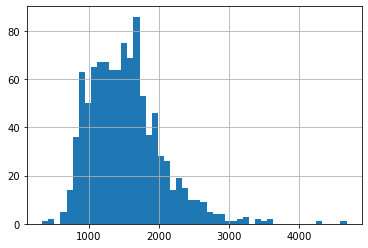

In [6]:
#before transforming
X_train['GrLivArea'].hist(bins=50)

In [7]:
# transforming variables
train_t = rt.transform(X_train)
test_t = rt.transform(X_test)

<AxesSubplot:>

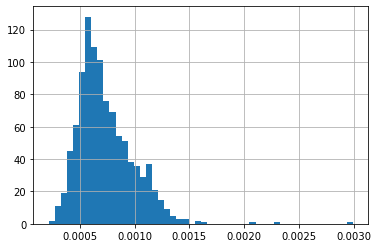

In [8]:
# transformed variable
train_t['GrLivArea'].hist(bins=50)

<AxesSubplot:>

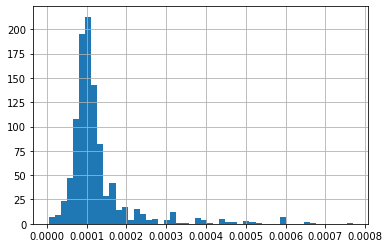

In [9]:
# transformed variable
train_t['LotArea'].hist(bins=50)

### Automatically select numerical variables

We select all numerical variables if no variables are passed. 
We cannot do reciprocal transformation on zero so we filter dataframe variables which have values less than 1 .


In [10]:
# Initialzing imputer transformer
arbitrary_imputer = ArbitraryNumberImputer(arbitrary_number=3)
arbitrary_imputer.fit(X_train)
X_train.shape

(1022, 79)

In [11]:
#transforming variables
train_t = arbitrary_imputer.transform(X_train)
test_t = arbitrary_imputer.transform(X_test)

In [12]:
# Keeing only numeric variables
train_t=train_t[arbitrary_imputer.variables]
test_t=test_t[arbitrary_imputer.variables]

In [13]:
#keeping only variables that have values  >=1 (we can do 1/0)
new_variables=list(train_t.ge(1).all(0)[train_t.ge(1).all(0)==True].index)
train_t=train_t[new_variables]
test_t=test_t[new_variables]

In [14]:
#initializing transformer
rt_default = ReciprocalTransformer()

rt_default.fit(train_t)

ReciprocalTransformer(variables=['MSSubClass', 'LotFrontage', 'LotArea',
                                 'OverallQual', 'OverallCond', 'YearBuilt',
                                 'YearRemodAdd', '1stFlrSF', 'GrLivArea',
                                 'TotRmsAbvGrd', 'GarageYrBlt', 'MoSold',
                                 'YrSold'])

<AxesSubplot:>

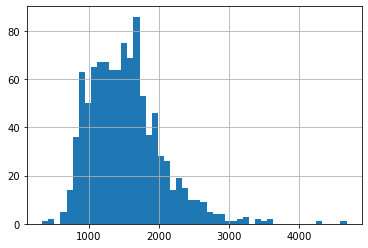

In [15]:
# before transforming 
train_t['GrLivArea'].hist(bins=50)

<AxesSubplot:>

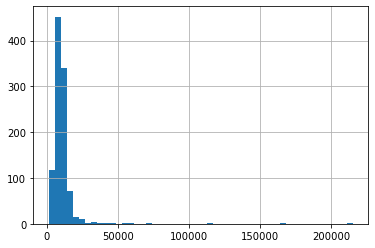

In [16]:
# before transforming 
train_t['LotArea'].hist(bins=50)

In [17]:
#transforming variables
train_t = rt_default.transform(train_t)
test_t = rt_default.transform(test_t)

<AxesSubplot:>

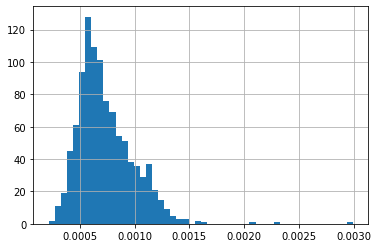

In [18]:
# transformed variable
train_t['GrLivArea'].hist(bins=50)

<AxesSubplot:>

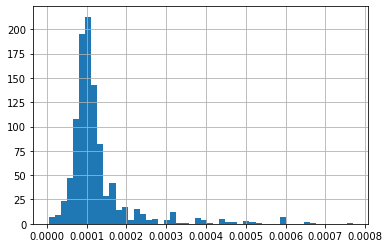

In [19]:
# transformed variable
train_t['LotArea'].hist(bins=50)